In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initialising the train, validation and test sets with images of vegetables

train_set = r"C:/Users\srian\OneDrive\Desktop\Vegetable Images\train"
validation_set = r"C:\Users\srian\OneDrive\Desktop\Vegetable Images\validation"
test_set = r"C:\Users\srian\OneDrive\Desktop\Vegetable Images\test"

veg_category = os.listdir(r'C:\Users\srian\OneDrive\Desktop\Vegetable Images\train')



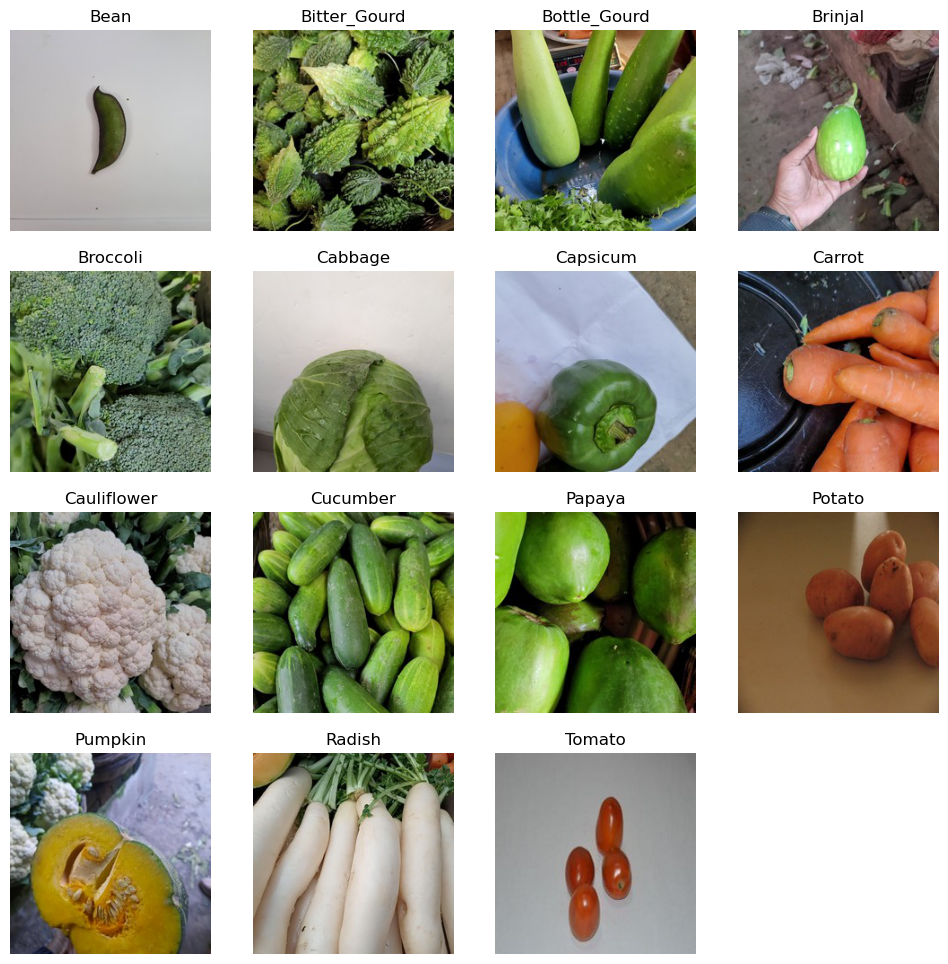

In [4]:
def plot(veg_category):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(veg_category):
        
        # Load images for the ith category
        image_path = train_set + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot(veg_category)
        

In [6]:
# Creating Image Data Generator for train, validation and test sets

# Train Set
train_generator = ImageDataGenerator(rescale = 1.0/255.0) # Normalising the data
train_image_generator = train_generator.flow_from_directory(train_set,target_size=(150, 150),batch_size=32,class_mode='categorical')

# Validation Set
val_generator = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_generator.flow_from_directory(validation_set,target_size=(150, 150),batch_size=32,class_mode='categorical')

# Test Set
test_generator = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_generator.flow_from_directory(test_set,target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [7]:
# Printing the class encodings for the vegetables
class_map = dict([(x, y) for y, x in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [9]:
# Building a custom sequential CNN model

model = Sequential()

# Adding Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flattening the feature map
model.add(Flatten())

# Adding the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
# fitting the model
early_stopping = keras.callbacks.EarlyStopping(patience=5)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=15, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/15
468/468 [==============================] - 113s 239ms/step - loss: 1.3718 - accuracy: 0.5489 - val_loss: 0.6489 - val_accuracy: 0.7964
Epoch 2/15
468/468 [==============================] - 117s 251ms/step - loss: 0.5599 - accuracy: 0.8196 - val_loss: 0.5050 - val_accuracy: 0.8458
Epoch 3/15
468/468 [==============================] - 118s 251ms/step - loss: 0.3062 - accuracy: 0.9028 - val_loss: 0.3175 - val_accuracy: 0.9036
Epoch 4/15
468/468 [==============================] - 117s 250ms/step - loss: 0.2165 - accuracy: 0.9299 - val_loss: 0.3118 - val_accuracy: 0.9056
Epoch 5/15
468/468 [==============================] - 119s 254ms/step - loss: 0.1769 - accuracy: 0.9428 - val_loss: 0.2865 - val_accuracy: 0.9194
Epoch 6/15
468/468 [==============================] - 118s 252ms/step - loss: 0.1282 - accuracy: 0.9580 - val_loss: 0.3851 - val_accuracy: 0.9046
Epoch 7/15
468/468 [==============================] - 114s 243ms/step - loss: 0.1101 - accuracy: 0.9648 - val_loss: 0.3034 -

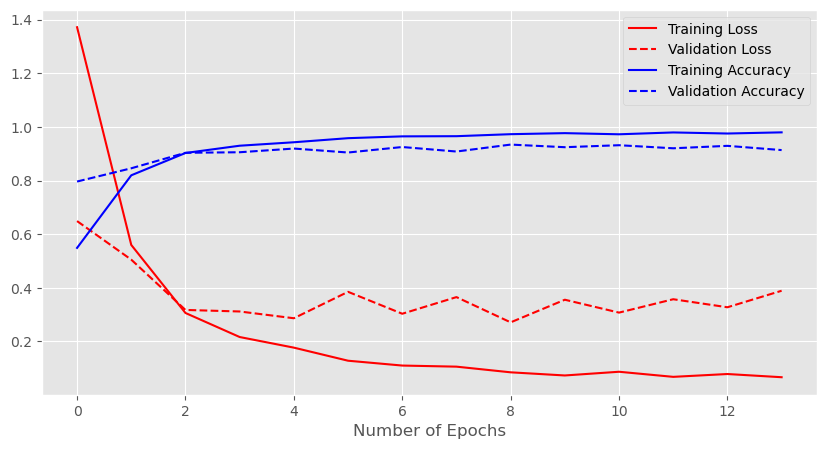

In [11]:
# Plotting the error and accuracy
history = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], c='red', label='Training Loss')
plt.plot(history['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(history['accuracy'], c='blue', label='Training Accuracy')
plt.plot(history['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [12]:
# Predicting the accuracy for the test set
model.evaluate(test_image_generator)

94/94 [==============================] - 4s 44ms/step - loss: 0.3797 - accuracy: 0.9163


[0.3796694874763489, 0.9163333177566528]

1/1 [==============================] - 0s 22ms/step


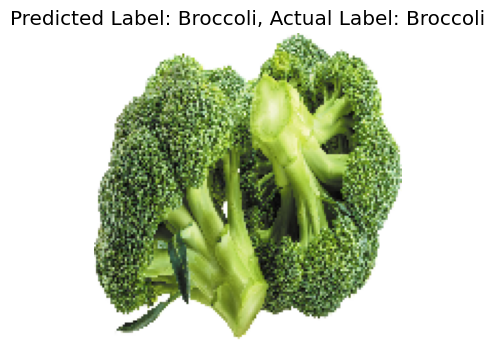

In [19]:
# Testing the Model
test_image_path = r'C:\Users\srian\Downloads\broccoli_test.jpg'

def predict(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_image = image.load_img(test_image_path, target_size=(150, 150))
    test_image_array = image.img_to_array(test_image)/255.0
    test_image_input = test_image_array.reshape((1, test_image_array.shape[0], test_image_array.shape[1], test_image_array.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_image_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_image_array)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
predict(test_image_path, actual_label='Broccoli')